In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(1,20,0.5)

In [3]:
x

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5])

In [4]:
y = x * 5.67 + 34.078

In [5]:
y

array([ 39.748,  42.583,  45.418,  48.253,  51.088,  53.923,  56.758,
        59.593,  62.428,  65.263,  68.098,  70.933,  73.768,  76.603,
        79.438,  82.273,  85.108,  87.943,  90.778,  93.613,  96.448,
        99.283, 102.118, 104.953, 107.788, 110.623, 113.458, 116.293,
       119.128, 121.963, 124.798, 127.633, 130.468, 133.303, 136.138,
       138.973, 141.808, 144.643])

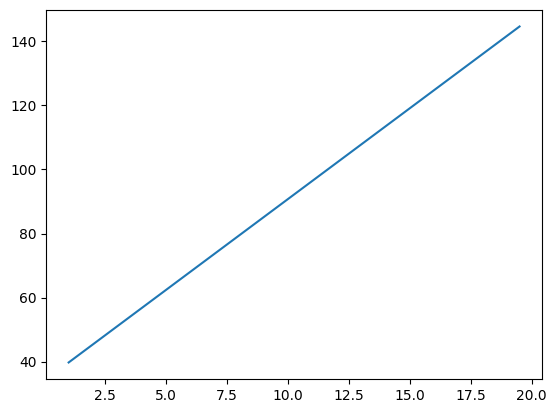

In [6]:
plt.plot(x, y)

##### Simple Linear Regression

In [7]:
# Values of height
x = np.array([[151], [174], [138], [186], [128], [136], [179], [163], [152], [131]])

# Values of weight.
y = np.array([63, 81, 56, 91, 47, 57, 76, 72, 62, 48])

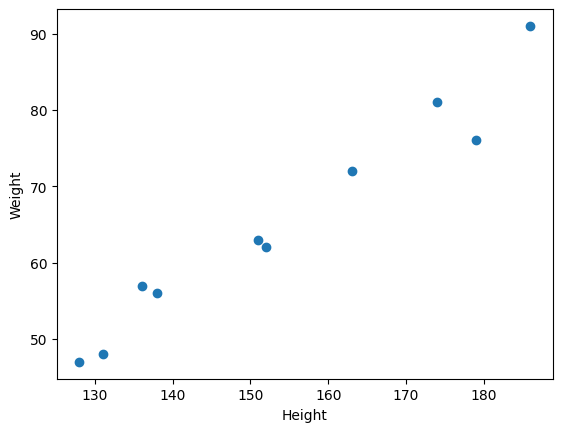

In [8]:
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x, y)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(x, y)

LinearRegression()

In [12]:
# value of m
reg.coef_

array([0.67461045])

In [13]:
# value of c
reg.intercept_

-38.45508707607699

###### Step-by-step

In [14]:
x.shape, y.shape

((10, 1), (10,))

In [15]:
# Step 1: Calculate the means of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

In [16]:
mean_x, mean_y

(153.8, 65.3)

In [17]:
x = x.flatten()

In [18]:
# Step 2: Calculate the slope (m)
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sum((x - mean_x) ** 2)
slope = numerator / denominator

In [19]:
slope

0.6746104491292392

In [20]:
# Step 3: Calculate the intercept (b)
intercept = mean_y - slope * mean_x

In [21]:
intercept

-38.45508707607699

In [22]:
# Print the slope and intercept
print("Slope (m):", slope)
print("Intercept (c):", intercept)

Slope (m): 0.6746104491292392
Intercept (c): -38.45508707607699


In [23]:
# y = m * x + c

175 * slope + intercept

79.60174152153986

In [24]:
166 * slope + intercept

73.53024747937671

In [25]:
149 * slope + intercept

62.06186984417964

In [26]:
y_pred = x * slope + intercept

In [27]:
y_pred

array([63.41109074, 78.92713107, 54.6411549 , 87.02245646, 47.89505041,
       53.29193401, 82.30018332, 71.50641613, 64.08570119, 49.91888176])

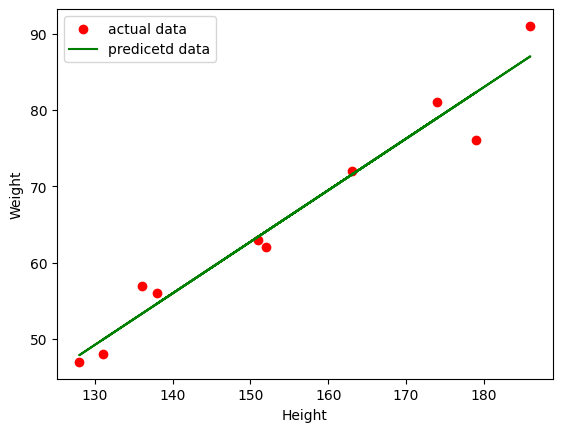

In [28]:
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x, y, label='actual data', color= 'r')
plt.plot(x, y_pred, label='predicetd data', color ='g')
plt.legend()

###### Mean absolute error

In [29]:
y_pred = y_pred.flatten()

In [30]:
y - y_pred

array([-0.41109074,  2.07286893,  1.3588451 ,  3.97754354, -0.89505041,
        3.70806599, -6.30018332,  0.49358387, -2.08570119, -1.91888176])

In [31]:
np.abs(y - y_pred)

array([0.41109074, 2.07286893, 1.3588451 , 3.97754354, 0.89505041,
       3.70806599, 6.30018332, 0.49358387, 2.08570119, 1.91888176])

In [32]:
np.mean(np.abs(y - y_pred))

2.3221814848762605

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mean_absolute_error(y, y_pred)

2.3221814848762605

##### Multiple Regression

In [36]:
# Dataset: mtcars.csv
# Location: https://mitu.co.in/dataset

In [37]:
# Current working directory
import os
os.getcwd()

'/home/mitu/Documents/study/Data Science/pgduasp/Programs-Apr24'

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('mtcars.csv')

In [40]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [41]:
# separate the input and output variables
x = df[['disp','hp','wt']]

y = df['mpg']

In [42]:
x.shape

(32, 3)

In [43]:
x.columns

Index(['disp', 'hp', 'wt'], dtype='object')

In [46]:
# import the class
from sklearn.linear_model import LinearRegression

In [47]:
# create the object
reg = LinearRegression()

In [48]:
# train the algorithm
reg.fit(x, y)

LinearRegression()

In [49]:
reg.coef_

array([-9.37009081e-04, -3.11565508e-02, -3.80089058e+00])

In [50]:
reg.intercept_

37.10550526903182

In [51]:
new = pd.DataFrame({
    'disp':[221],
    'hp':[102],
    'wt':[2.91]
})

In [52]:
new

,disp,hp,wt
0,221,102,2.91


In [53]:
reg.predict(new)

array([22.65986648])

In [55]:
221 *-9.37009081e-04 + 102 * -3.11565508e-02 + 2.91 * -3.80089058e+00 + 37.10550526903182

22.659866492730824

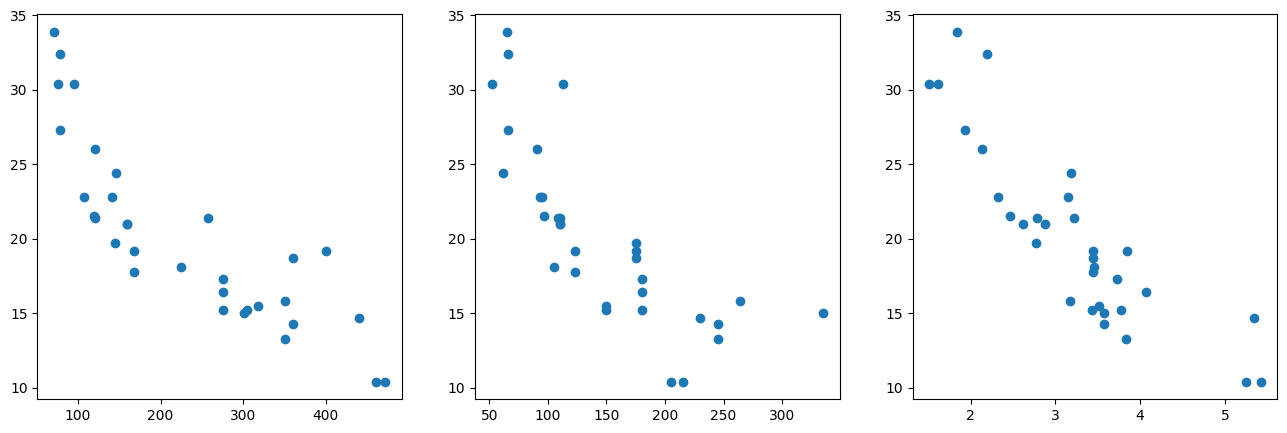

In [58]:
# Visualize

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.scatter(x['disp'], y)
plt.subplot(1,3,2)
plt.scatter(x['hp'], y)
plt.subplot(1,3,3)
plt.scatter(x['wt'], y)

In [60]:
y_pred = reg.predict(x)

In [61]:
y_pred

array([23.5700299 , 22.6008028 , 25.28868291, 21.21667311, 18.240722  ,
       20.47215897, 15.56564767, 22.91149893, 22.04089673, 20.04114319,
       20.04114319, 15.76927434, 17.06157714, 16.87153261, 10.3214685 ,
        9.35979214,  9.21145442, 26.61347102, 29.27599475, 28.0390739 ,
       24.60158976, 18.75491891, 19.09111273, 14.5487773 , 16.66388095,
       27.62042592, 26.0236311 , 27.74495801, 16.50246252, 20.98877564,
       12.81684163, 23.02958731])

In [65]:
# mean absolute error
np.mean(abs(y - y_pred))

1.9070264019715122

In [66]:
from sklearn.metrics import mean_absolute_error

In [67]:
mean_absolute_error(y, y_pred)

1.9070264019715122

In [71]:
# root mean squared error
np.sqrt(np.mean((y - y_pred) ** 2))

2.468493181075731

In [72]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, y_pred))

2.468493181075731

In [73]:
# r-squared error
mean_val = np.mean(y)

In [75]:
mean_val

20.090625000000003

In [80]:
var_mean = np.sum((y - mean_val)**2)

In [81]:
var_line = np.sum((y - y_pred)**2)

In [82]:
r2 = (var_mean - var_line) / var_mean

In [83]:
r2

0.8268361424946447

In [84]:
from sklearn.metrics import r2_score

In [85]:
r2_score(y, y_pred)

0.8268361424946447

##### Polynomial Regression

In [87]:
import numpy as np

In [88]:
x = np.arange(0,10,0.25)

In [89]:
x

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
       8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])

In [90]:
y = x ** 2 + 0.46

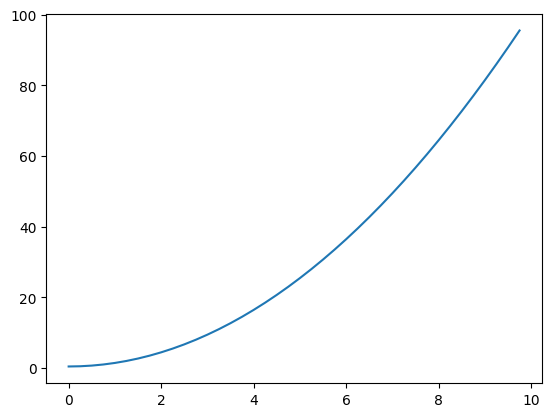

In [91]:
plt.plot(x, y)

In [92]:
# Dataset: Salary_Data.csv
# Location: https://mitu.co.in/dataset

In [93]:
df = pd.read_csv('Salary_Data.csv')

In [94]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


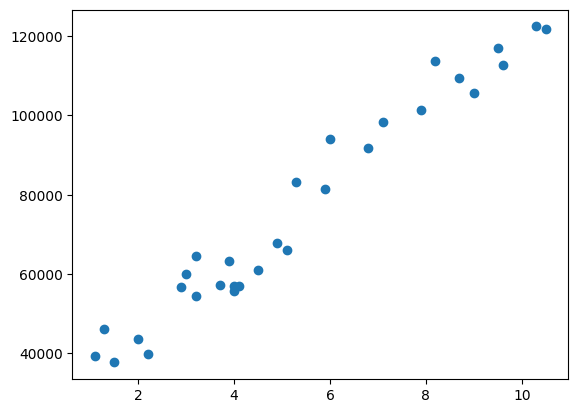

In [95]:
plt.scatter(df['YearsExperience'], df['Salary'])

In [97]:
x = df[['YearsExperience']]
y = df['Salary']

In [98]:
reg = LinearRegression()
reg.fit(x, y)
print('Accuracy:', reg.score(x, y))

Accuracy: 0.9569566641435086


In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
poly = PolynomialFeatures(degree=2)

In [101]:
x_poly = poly.fit_transform(x)

In [102]:
x_poly

array([[  1.  ,   1.1 ,   1.21],
       [  1.  ,   1.3 ,   1.69],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.2 ,   4.84],
       [  1.  ,   2.9 ,   8.41],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.2 ,  10.24],
       [  1.  ,   3.7 ,  13.69],
       [  1.  ,   3.9 ,  15.21],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   4.9 ,  24.01],
       [  1.  ,   5.1 ,  26.01],
       [  1.  ,   5.3 ,  28.09],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   6.8 ,  46.24],
       [  1.  ,   7.1 ,  50.41],
       [  1.  ,   7.9 ,  62.41],
       [  1.  ,   8.2 ,  67.24],
       [  1.  ,   8.7 ,  75.69],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  10.5 , 110.25]])

In [104]:
reg = LinearRegression()
reg.fit(x_poly, y)
print('Accuracy:', reg.score(x_poly, y))

Accuracy: 0.956975168321065


In [106]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

reg = LinearRegression()
reg.fit(x_poly, y)
print('Accuracy:', reg.score(x_poly, y))

Accuracy: 0.9636560599375091


In [107]:
poly = PolynomialFeatures(degree=8)
x_poly = poly.fit_transform(x)

reg = LinearRegression()
reg.fit(x_poly, y)
print('Accuracy:', reg.score(x_poly, y))

Accuracy: 0.9728154307144777


In [108]:
poly = PolynomialFeatures(degree=12)
x_poly = poly.fit_transform(x)

reg = LinearRegression()
reg.fit(x_poly, y)
print('Accuracy:', reg.score(x_poly, y))

Accuracy: 0.9830101778689884


##### Logistic Regression

In [110]:
x = np.arange(-5,5,0.25)

In [111]:
x

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [112]:
y = 1 / (1 + np.exp(-x))

In [113]:
y

array([0.00669285, 0.00857749, 0.01098694, 0.01406363, 0.01798621,
       0.02297737, 0.02931223, 0.03732689, 0.04742587, 0.06008665,
       0.07585818, 0.09534946, 0.11920292, 0.1480472 , 0.18242552,
       0.22270014, 0.26894142, 0.3208213 , 0.37754067, 0.4378235 ,
       0.5       , 0.5621765 , 0.62245933, 0.6791787 , 0.73105858,
       0.77729986, 0.81757448, 0.8519528 , 0.88079708, 0.90465054,
       0.92414182, 0.93991335, 0.95257413, 0.96267311, 0.97068777,
       0.97702263, 0.98201379, 0.98593637, 0.98901306, 0.99142251])

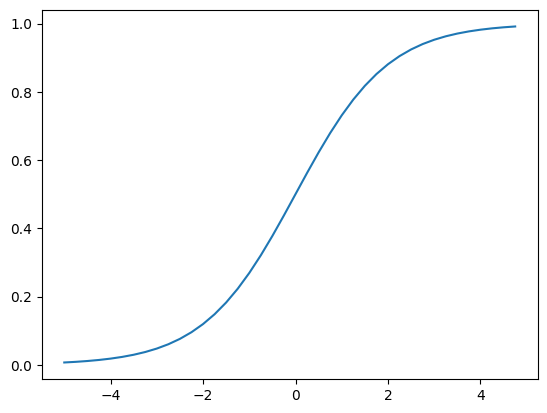

In [114]:
plt.plot(x, y)

In [115]:
# Dataset: banknotes.csv
# Location: https://mitu.co.in/dataset

In [116]:
df = pd.read_csv('banknotes.csv')

In [117]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [118]:
# separate the input and output variables
x = df.drop('Class', axis = 1)
y = df['Class']

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logr = LogisticRegression()

In [121]:
logr.fit(x, y)

LogisticRegression()

In [127]:
new1 = np.array([[3.45660, 9.52280, -4.0112, -3.59440]])
new2 = np.array([[-3.75030, -13.45860, 17.5932, -2.77710]])

In [128]:
new1

array([[ 3.4566,  9.5228, -4.0112, -3.5944]])

In [129]:
new2

array([[ -3.7503, -13.4586,  17.5932,  -2.7771]])

In [131]:
logr.predict_proba(new1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.99999916e-01, 8.38086812e-08]])

In [132]:
logr.predict_proba(new2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.19416281, 0.80583719]])